In [1]:
import sys

In [2]:
print (sys.version)

3.6.3 (default, Oct  3 2017, 21:45:48) 
[GCC 7.2.0]


In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
# datafile = 'data/cosmic-array.log.20180217'

In [6]:
datafile = 'data/cosmic-array.log.combined'

In [7]:
data = pd.read_csv(open(datafile),
                   sep='\s+',
                   header=None,
                   names=['datetime','channel'],
                   dtype={'datetime': str}
                   )

In [8]:
data.head()

,datetime,channel
0,1515142282.402535,0
1,1515142326.281502,1
2,1515142336.376112,1
3,1515142352.652629,1
4,1515142356.622843,1


In [9]:
data.describe()

,channel
count,491505.000000
mean,0.901602
std,0.818620
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


In [10]:
pd.to_datetime(1490195805, unit='s')

Timestamp('2017-03-22 15:16:45')

In [11]:
pd.to_datetime(int("1515142000"),unit="s")

Timestamp('2018-01-05 08:46:40')

In [12]:
pd.to_datetime(float("1515142000.12345"),unit="s")

Timestamp('2018-01-05 08:46:40.123450')

In [13]:
timestmp=pd.to_datetime(float(data.head(1).datetime), unit="s");
date_from = '{}{:02d}{:02d}'.format(timestmp.year,timestmp.month,timestmp.day)

timestmp=pd.to_datetime(float(data.tail(1).datetime), unit="s");
date_to = '{}{:02d}{:02d}'.format(timestmp.year,timestmp.month,timestmp.day)

print("Date from: ",date_from)
print("Date to:   ",date_to)

figfilename='plot-muon-counts-{}-{}.png'.format(date_from, date_to)
print("Image:     ", figfilename)

Date from:  20180105
Date to:    20180402
Image:      plot-muon-counts-20180105-20180402.png


In [14]:
bin=6 # Binsize in Hours

In [15]:
binsize=60*60*bin

In [16]:
binsizetext="bin size of "+str(bin)+" hours"

In [17]:
titletext="Detector Events (counts per hour, "+binsizetext+")"

In [18]:
databin = data.datetime.apply(lambda x: pd.to_datetime((float(x)//binsize)*binsize,unit='s'))

In [19]:
databincounts = databin.value_counts()

In [20]:
databinDF = pd.DataFrame(databincounts/bin)

In [21]:
databinDF.columns = ["total"]

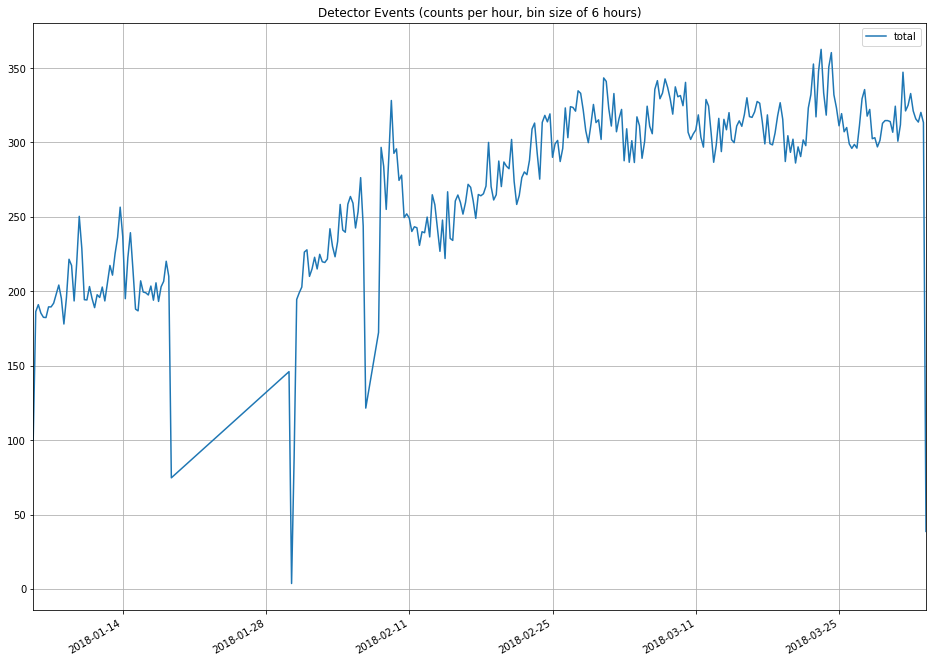

In [22]:
databinDF.plot(title=titletext,grid=True,figsize=(16,12))

In [23]:
databin0 = data.datetime[(data.channel == 0)].apply(lambda x: pd.to_datetime((float(x)//binsize)*binsize,unit='s'))

In [24]:
databin0counts = databin0.value_counts()

In [25]:
databin0DF = pd.DataFrame(databin0counts/bin)

In [26]:
databin0DF.columns = ["channel 0"]

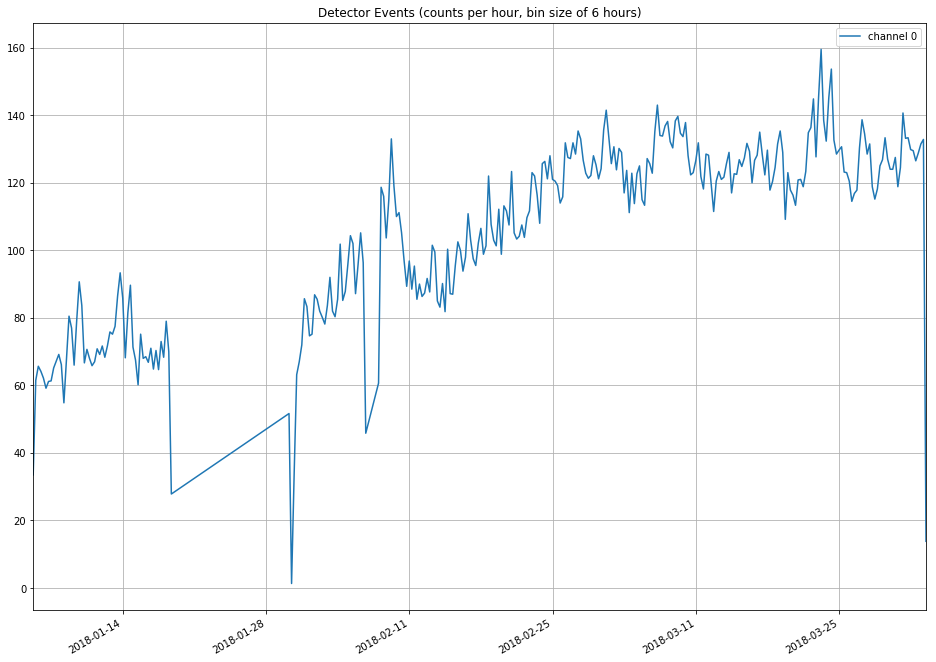

In [27]:
databin0DF.plot(title=titletext,grid=True,figsize=(16,12))

In [28]:
databin1 = data.datetime[(data.channel == 1)].apply(lambda x: pd.to_datetime((float(x)//binsize)*binsize,unit='s'))

In [29]:
databin1counts=databin1.value_counts()

In [30]:
databin1DF = pd.DataFrame(databin1counts/bin)

In [31]:
databin1DF.columns = ["channel 1"]

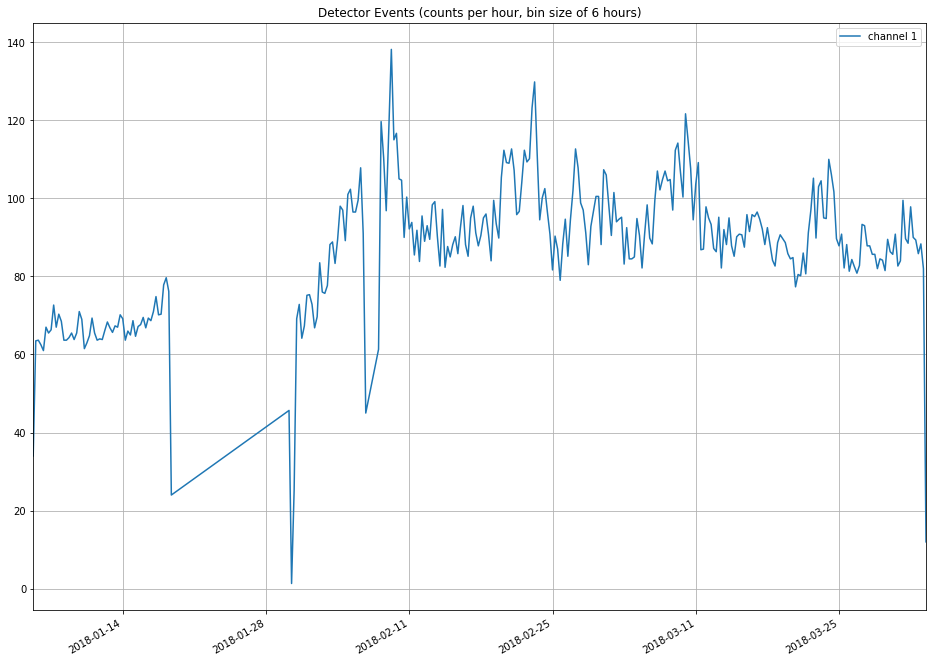

In [32]:
databin1DF.plot(title=titletext, grid=True,figsize=(16,12))

In [33]:
databin2 = data.datetime[(data.channel == 2)].apply(lambda x: pd.to_datetime((float(x)//binsize)*binsize,unit='s'))

In [34]:
databin2counts = databin2.value_counts()

In [35]:
databin2DF = pd.DataFrame(databin2counts/bin)

In [36]:
databin2DF.columns = ["channel 2"]

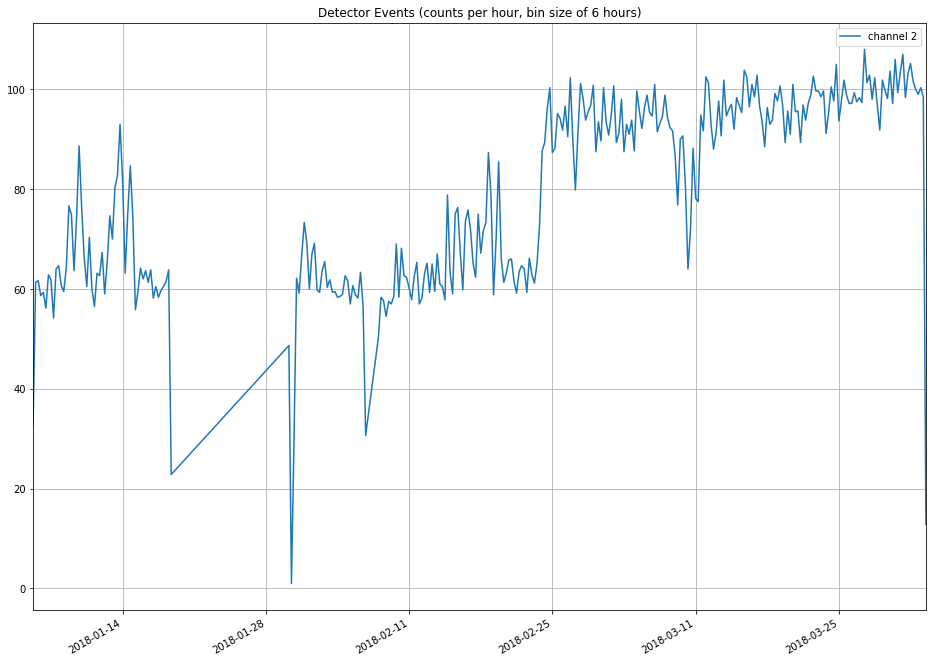

In [37]:
databin2DF.plot(title=titletext,grid=True,figsize=(16,12))

In [38]:
databin2DF.head(2)

,channel 2
2018-03-27 12:00:00,108.0
2018-03-31 06:00:00,107.0


In [39]:
datacombined=pd.concat([databinDF,databin0DF,databin1DF,databin2DF], axis=1)

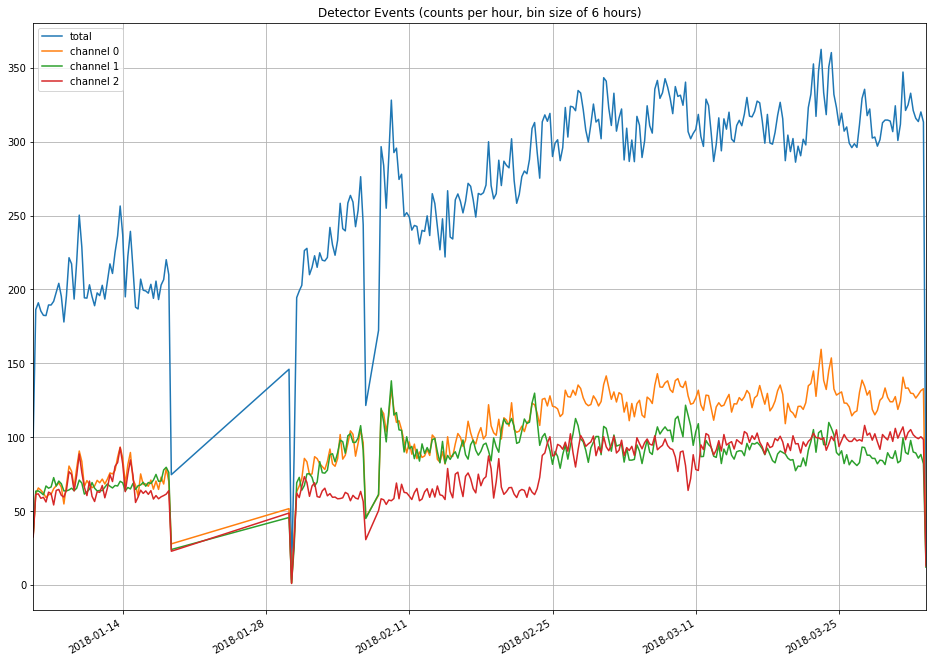

In [40]:
datacombined.plot(title=titletext, grid=True, figsize=(16,12))
plt.savefig(figfilename)